Лабораторная работа №2. Выполнила Андрющенко К.С.

In [62]:
import random
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

**Условия**  
1. Первый студент создает первый клуб  
```
    groups = []  # список для хранения размеров клубов
    group_sizes = defaultdict(int)  # словарь для хранения размеров клубов
    groups.append(1)
    group_sizes[0] = 1
```
2. Каждый новый студент либо создает новый клуб с вероятностью
$𝑝$, либо присоединяется к существующему клубу с вероятностью
$1−𝑝$
3. Выбор клуба происходит пропорционально его размеру
```
    total_members_in_groups = sum(groups) # общее     количество студентов во всех клубах
    join_probs = [size / total_members_in_groups for size in groups] # вероятности выбора каждого клуба
    selected_group = np.random.choice(len(groups), p=join_probs) # выбор луб на основе вычисленных вероятностей
```
4. Известно количество студентов, студенты идуут последовательно, вероятность $p$


In [63]:
import random
from collections import defaultdict
import numpy as np

In [64]:
def dynamic_group_formation(total_members, creation_prob):
    groups = []  # список для хранения размеров групп
    group_sizes = defaultdict(int)  # словарь для хранения размеров групп
    # начальные условия
    groups.append(1)
    group_sizes[0] = 1

    for i in range(1, total_members):
        # создание новой группы
        if random.random() < creation_prob:
            groups.append(1)
            group_sizes[len(groups) - 1] = 1
        else:
            # выбор группы для присоединения
            total_members_in_groups = sum(groups)
            join_probs = [size / total_members_in_groups for size in groups]
            selected_group = np.random.choice(len(groups), p=join_probs)
            groups[selected_group] += 1
            group_sizes[selected_group] += 1
    #print('Размеры групп (в порядке создания): ', groups)
    #print('Размеры групп с идентификаторами: ', dict(group_sizes))
    return groups, group_sizes

In [65]:
# Параметры тестовые
num_students = 250
p = 0.4  # вероятность создания нового клуба

clubs, club_sizes = dynamic_group_formation(num_students, p)

Визуализация размеров клубов

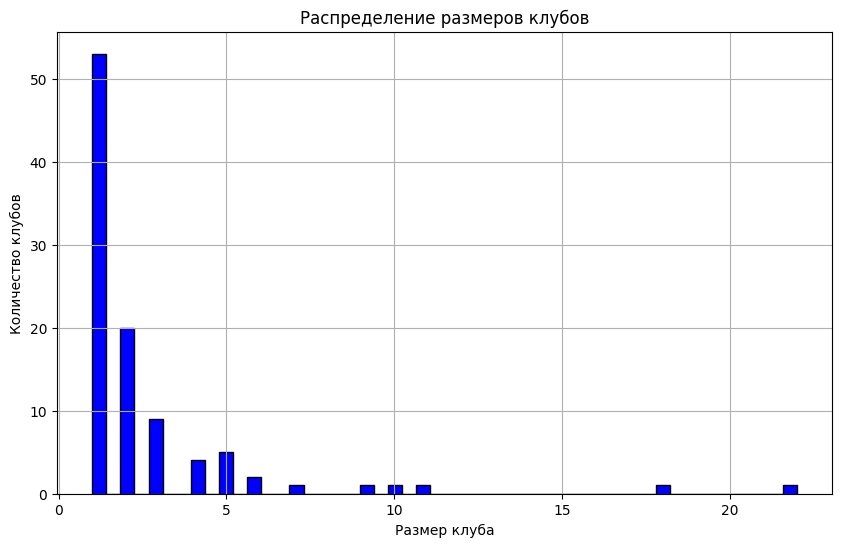

In [66]:
def drow_hist(clubs):
    plt.figure(figsize=(10, 6))
    plt.hist(clubs, bins=50, color='blue', edgecolor='black')
    plt.title('Распределение размеров клубов')
    plt.xlabel('Размер клуба')
    plt.ylabel('Количество клубов')
    plt.grid(True)
    plt.show()
drow_hist(clubs)

* При p<= 0.4 (есть несколько клубов (один), которые привлекают непропорционально большое количество студентов 49 (при текущем запуске), что связано с механизмом предпочтительного присоединения)

Увеличение количества студентов до 2500 при том же $p$.

In [67]:
num_students = 2500
p = 0.4  # вероятность создания нового клуба
clubs, club_sizes = dynamic_group_formation(num_students, p)

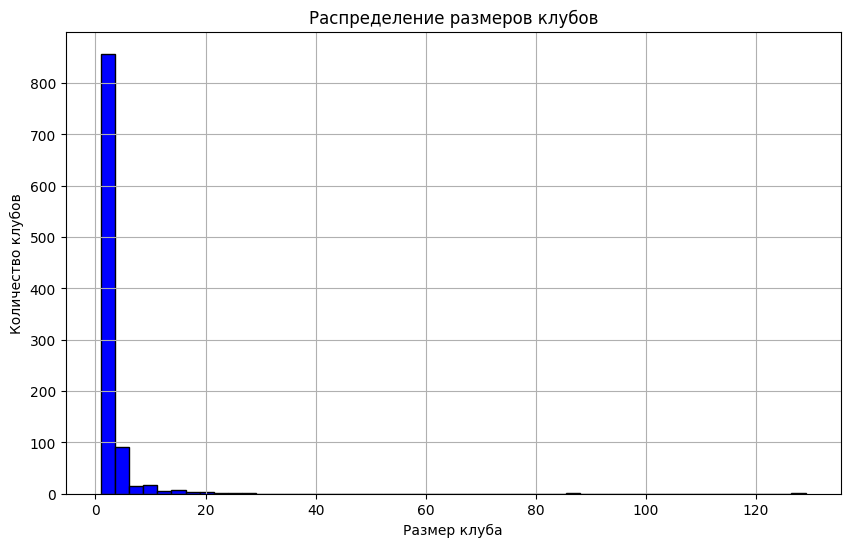

In [68]:
drow_hist(clubs)

* Несколько клубов, которые привлекают непропорционально большое количество студентов (тялый хвост распределения?)

Запуск модели для различных значений параметра $p$. Для каждого $p$ получим размер клубов.

In [69]:
import pandas as pd
import numpy as np

In [70]:
num_students = 2500
p_values = np.linspace(0.1, 0.99, 50)

In [71]:
# DataFrame для хранения данных
data = {'p': [], 'club_sizes': []}
# клубы для каждого значения p
for p in p_values:
    clubs, _ = dynamic_group_formation(num_students, p)
    data['p'].append(p)
    data['club_sizes'].append(clubs)
df = pd.DataFrame(data)

print(df.head())

          p                                         club_sizes
0  0.100000  [1002, 256, 4, 3, 6, 16, 125, 111, 112, 7, 65,...
1  0.118163  [1228, 33, 100, 19, 183, 15, 5, 28, 28, 24, 28...
2  0.136327  [365, 126, 226, 95, 117, 5, 3, 6, 118, 84, 45,...
3  0.154490  [1171, 112, 3, 3, 29, 17, 25, 1, 50, 26, 7, 15...
4  0.172653  [1028, 20, 52, 7, 91, 54, 44, 9, 35, 67, 20, 8...


Выборочно построим гистограммы для значений из диапазона $p$

In [72]:
target_p_values = [0.2, 0.5, 0.7, 0.9]
nearest_p_values = []
for target_p in target_p_values:
    differences = np.abs(df['p'] - target_p)
    # индекс ближайшего значения
    nearest_index = differences.argmin()
    nearest_p_values.append(df.loc[nearest_index, 'p'])

# ближайшие значения
print("Ближайшие значения p:", nearest_p_values)

# Фильтрация DataFrame
filtered_df = df[df['p'].isin(nearest_p_values)]

Ближайшие значения p: [0.2089795918367347, 0.4995918367346939, 0.6993877551020408, 0.8991836734693877]


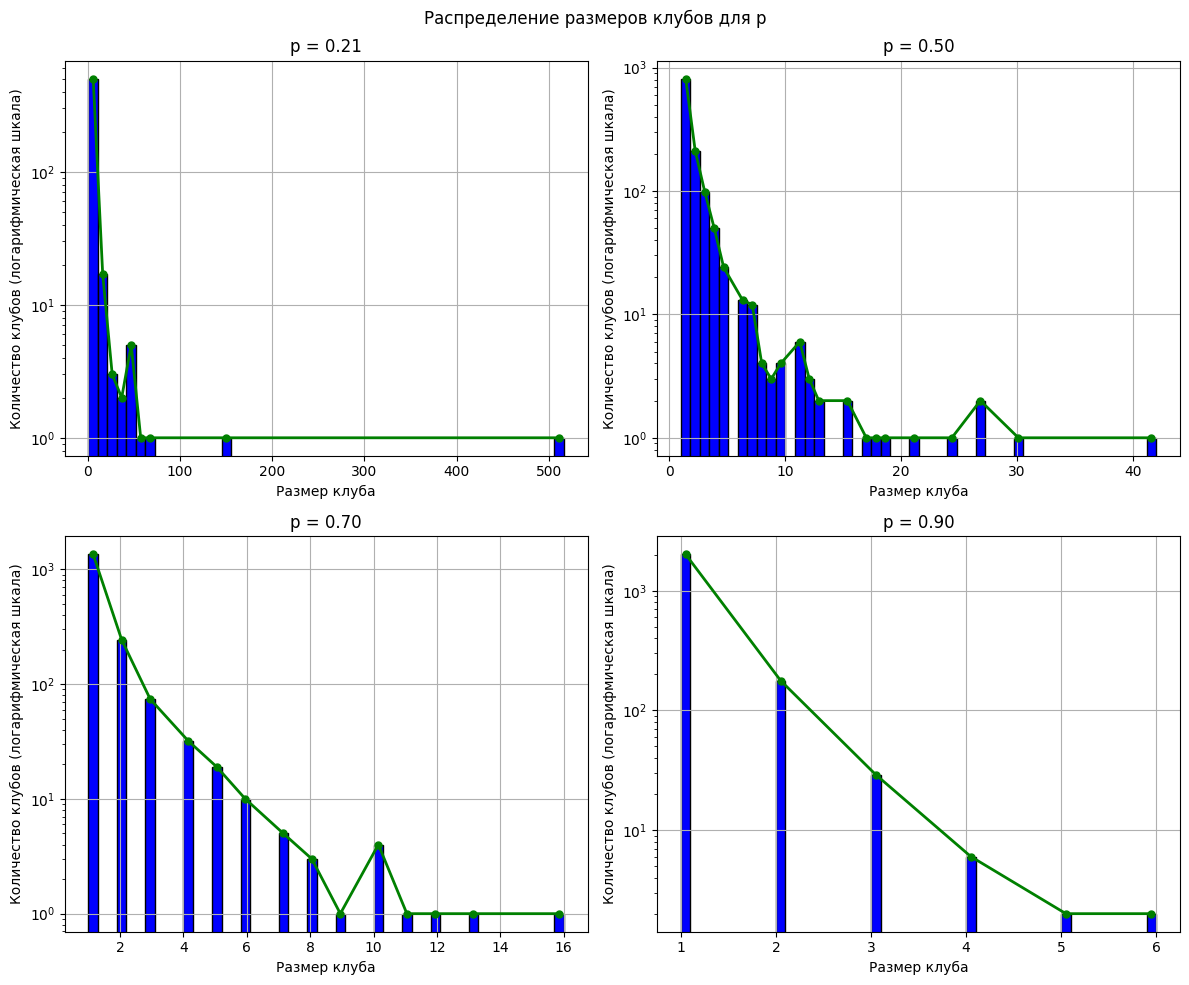

In [73]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Распределение размеров клубов для p')

# гистограмма для каждого найденного значения p
for i, (index, row) in enumerate(filtered_df.iterrows()):
    p = row['p']
    sizes = row['club_sizes']
    ax = axes[i // 2, i % 2]

    # гистограмма
    counts, bin_edges, _ = ax.hist(sizes, bins=50, color='blue', edgecolor='black', log=True)

    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    # исключаем столбцы с нулевой высотой (для отрисовки типа апроксимирующей линии)
    non_zero_mask = counts > 0
    bin_centers_filtered = bin_centers[non_zero_mask]
    counts_filtered = counts[non_zero_mask]

    ax.plot(bin_centers_filtered, counts_filtered, color='green', marker='o', linestyle='-', linewidth=2, markersize=5)

    ax.set_title(f'p = {p:.2f}')
    ax.set_xlabel('Размер клуба')
    ax.set_ylabel('Количество клубов (логарифмическая шкала)')
    ax.grid(True)

plt.tight_layout()
plt.show()

* Для меньших значений распределение имеет более выраженный тяжёлый хвост (много маленьких клубов и несколько очень крупных). При выбранных значениях $p=0.69$ и $p=0.87$ более равномерном распределении размеров клубов.

Найти показатель распределения a и его зависимость от параметра p.

Для каждого $p$ используем ММП для нахождения показателя $a$.

* Стоит обратить внимание на степенной закон   
Степенное распределение, заданное на интервале $[x_min, ∞)$,
имеет следующий вид:


In [74]:
import pandas as pd
import numpy as np
from scipy.stats import kstest, chisquare, powerlaw, expon, norm, kstest, pareto, zipf

In [75]:
df = pd.DataFrame(data)

# выборочные значения p
target_p_values = [0.2, 0.4, 0.8, 0.9]

# ближайшие значения p
nearest_p_values = []
for target_p in target_p_values:
    differences = np.abs(df['p'] - target_p)
    nearest_index = differences.argmin()
    nearest_p_values.append(df.loc[nearest_index, 'p'])

print("Ближайшие значения p:", nearest_p_values)

filtered_df = df[df['p'].isin(nearest_p_values)]

Ближайшие значения p: [0.2089795918367347, 0.40877551020408165, 0.8083673469387754, 0.8991836734693877]


Плотность вероятности степенного распределения:
$$
P(x) = \frac{a - 1}{x_{\text{min}}} \left(\frac{x}{x_{\text{min}}}\right)^{-a}, \quad x \geq x_{\text{min}}
$$

Оценка параметра \(a\) методом максимального правдоподобия (ММП):
$$
a = 1 + \frac{n}{\sum_{i=1}^n \ln\left(\frac{x_i}{x_{\text{min}}}\right)}
$$

Нормировочная константа \(C\):
$$
C = (a - 1) \cdot x_{\text{min}}^{a - 1}
$$

In [76]:
import matplotlib.pyplot as plt
from scipy.stats import chisquare

Построение графиков эмперических (наблюдаемых) данных и теоретических при оцененом параметре $a$

In [91]:
def estimate_params(sizes):
    if not sizes:
        return None, None
    min_size = np.min(sizes)
    a = 1 + len(sizes) / np.sum(np.log(sizes / min_size))
    C = (a - 1) * (min_size ** (a - 1))
    return a, C

def analyze_distribution(row):
    sizes, p = row.get('club_sizes', []), row.get('p', None)
    if not isinstance(sizes, list) or not sizes:
        return {'a': None, 'C': None, 'chi2_stat': None, 'chi2_p': None}

    filtered_sizes = [x for x in sizes if x > 0]
    if not filtered_sizes:
        return {'a': None, 'C': None, 'chi2_stat': None, 'chi2_p': None}

    # оценка параметра a и константы C
    exponent, constant = estimate_params(filtered_sizes)
    if exponent is None:
        return {'a': None, 'C': None, 'chi2_stat': None, 'chi2_p': None}

    # нормируем данные на интервал [0, 1]
    normalized_sizes = np.array(filtered_sizes) / np.max(filtered_sizes)

    # построение гистограммы нормированных размеров групп
    plt.figure(figsize=(8, 6))
    plt.hist(normalized_sizes, bins=20, color='blue', edgecolor='black', alpha=0.7, label='эмпирические данные')
    plt.title(f'распределение нормированных размеров групп a = {round(exponent, 3)}, p = {p:.4f}')
    plt.xlabel('нормированные размеры групп')
    plt.ylabel('частота')
    plt.grid(True)

    # вычисление ожидаемых частот для степенного закона
    bin_edges = np.linspace(0, 1, 21)  # 20 интервалов (21 край)
    observed_frequencies, _ = np.histogram(normalized_sizes, bins=bin_edges)  # абсолютные частоты
    expected_frequencies = []
    for i in range(len(bin_edges) - 1):
        lower = bin_edges[i]
        upper = bin_edges[i + 1]
        if upper > 0 and lower > 0:
            expected_frequency = constant / (1 - exponent) * (upper**(1 - exponent) - lower**(1 - exponent))
        else:
            expected_frequency = 0  # игнорируем неверные значения
        expected_frequencies.append(expected_frequency)

    # нормируем ожидаемые частоты, чтобы их сумма совпадала с суммой наблюдаемых частот
    expected_frequencies = np.array(expected_frequencies)
    expected_frequencies *= np.sum(observed_frequencies) / np.sum(expected_frequencies)

    # убедимся, что ожидаемые частоты не равны нулю
    expected_frequencies[expected_frequencies == 0] = 1e-10  # заменяем нули на очень маленькое значение

    # построение теоретической гистограммы
    plt.plot(bin_edges[2:], expected_frequencies[1:], color='green', linewidth=2, label='теоретическое распределение')
    plt.legend()
    plt.show()

    # тест хи-квадрат
    chi2_statistic, chi2_p_value = chisquare(observed_frequencies, f_exp=expected_frequencies)
    return {'a': round(exponent, 3), 'C': round(constant, 3), 'chi2_stat': round(chi2_statistic, 7), 'chi2_p': round(chi2_p_value, 8)}



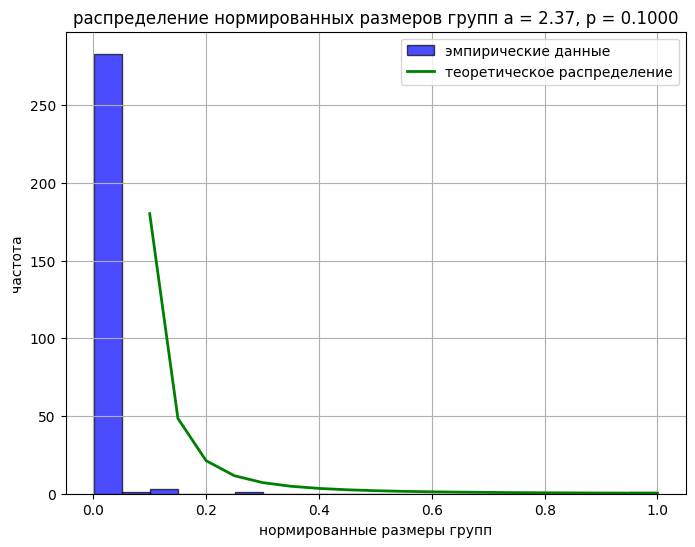

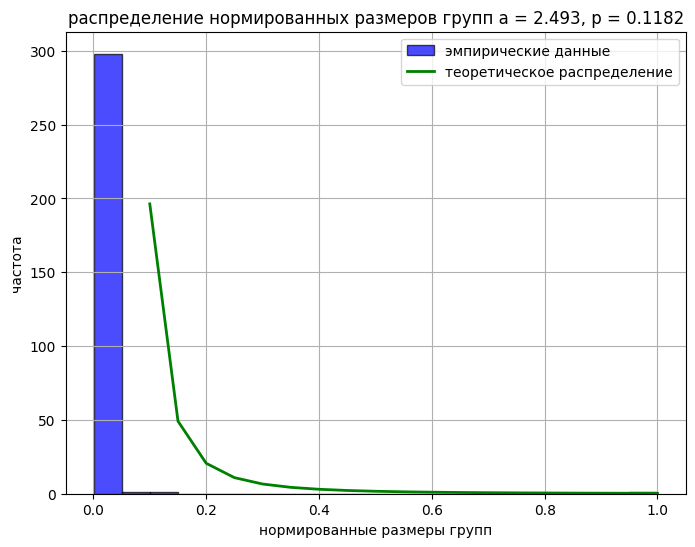

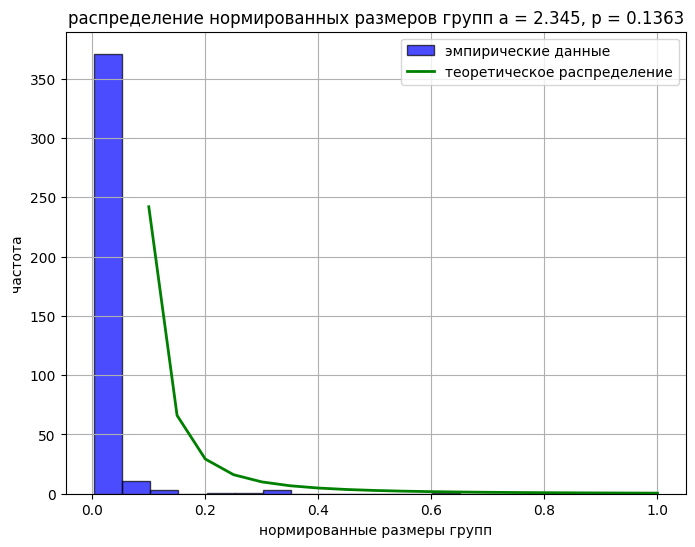

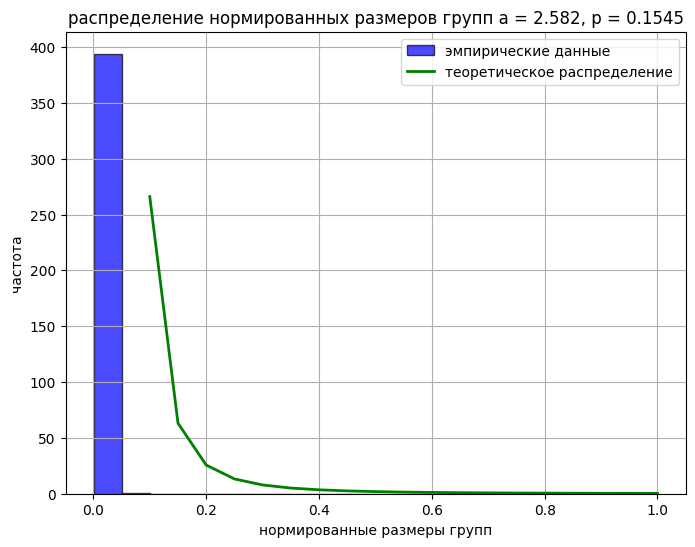

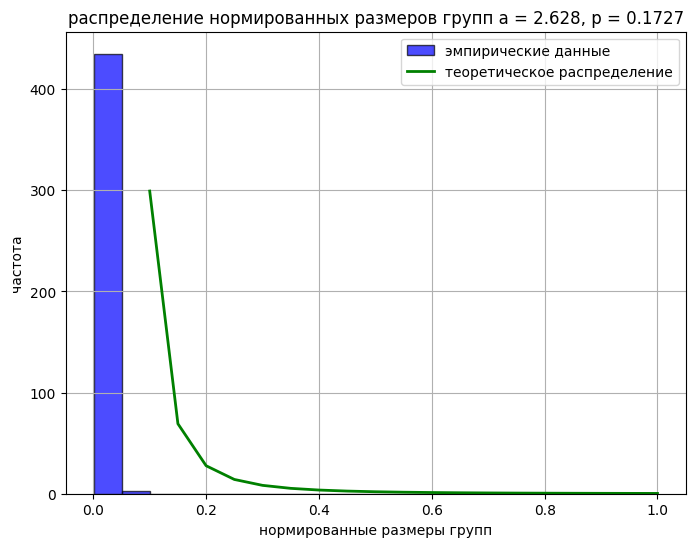

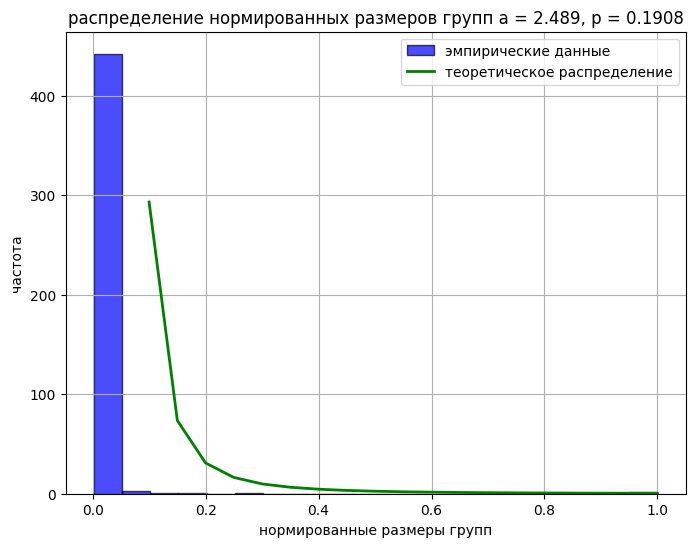

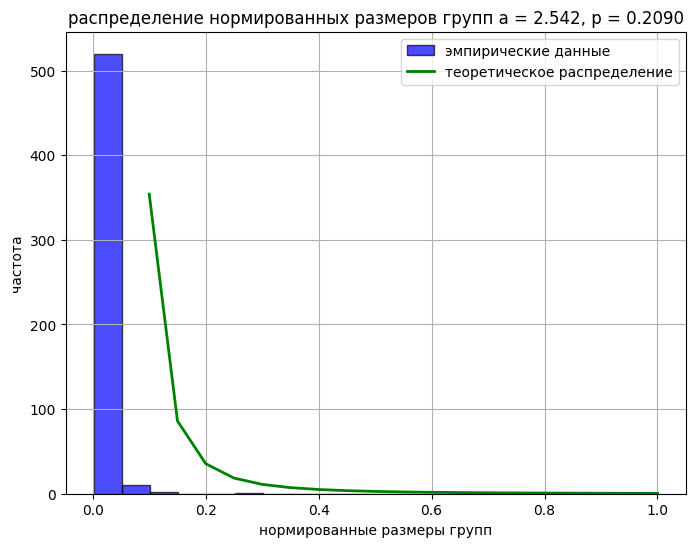

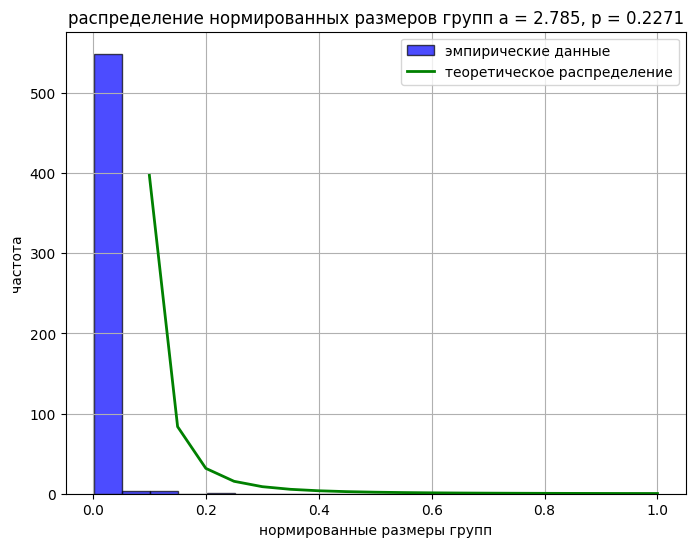

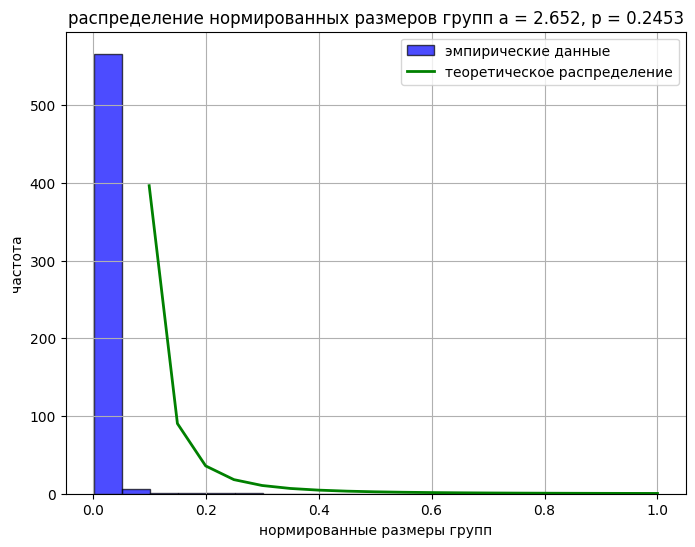

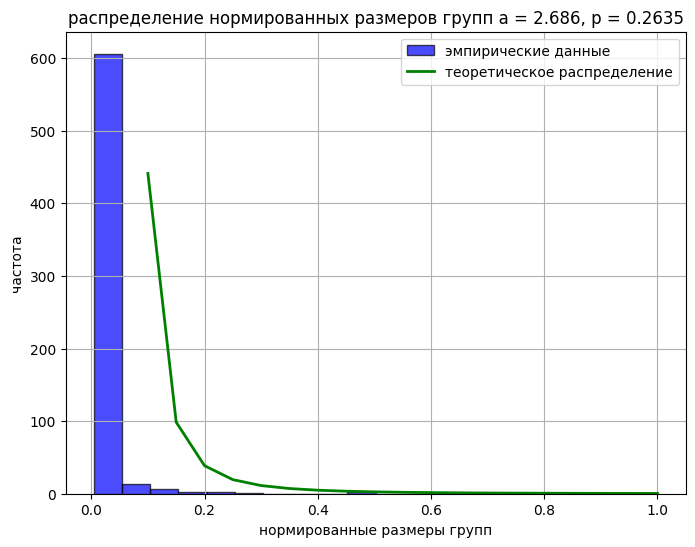

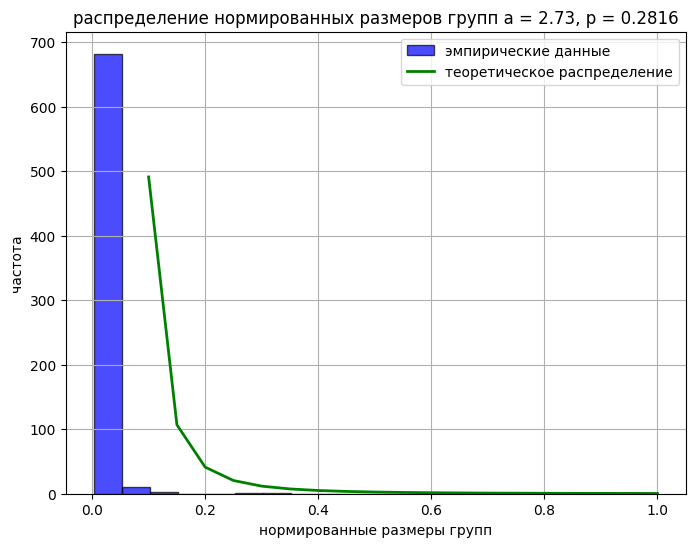

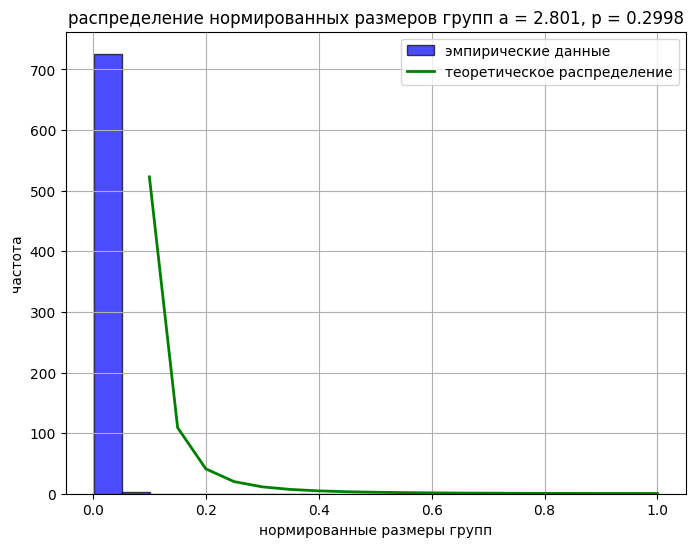

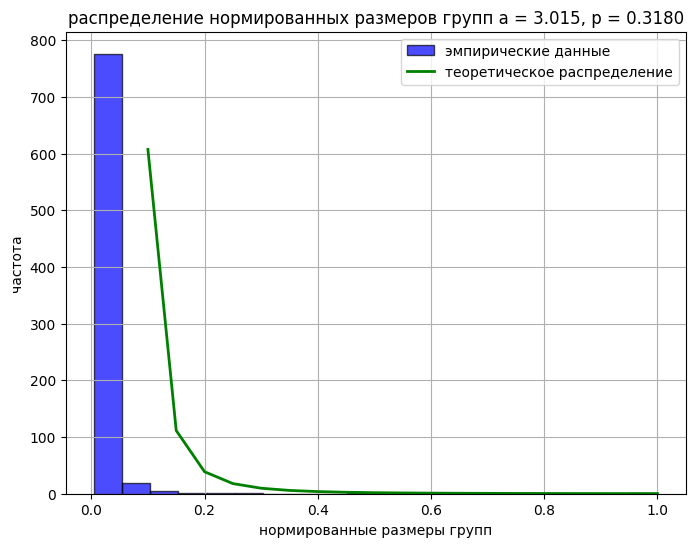

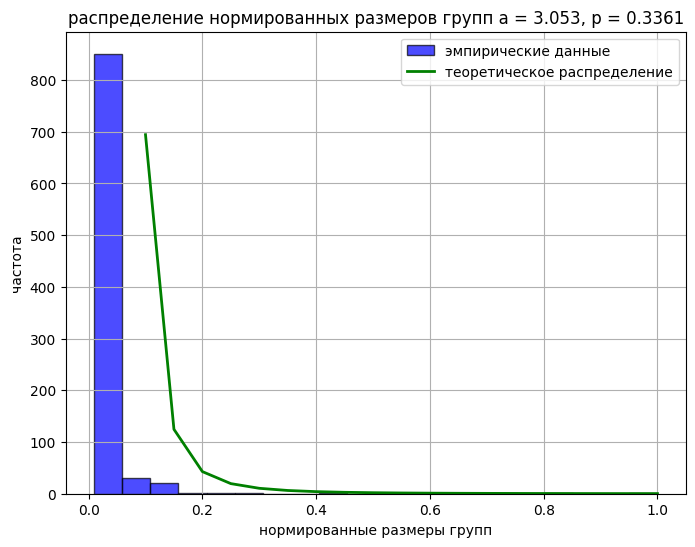

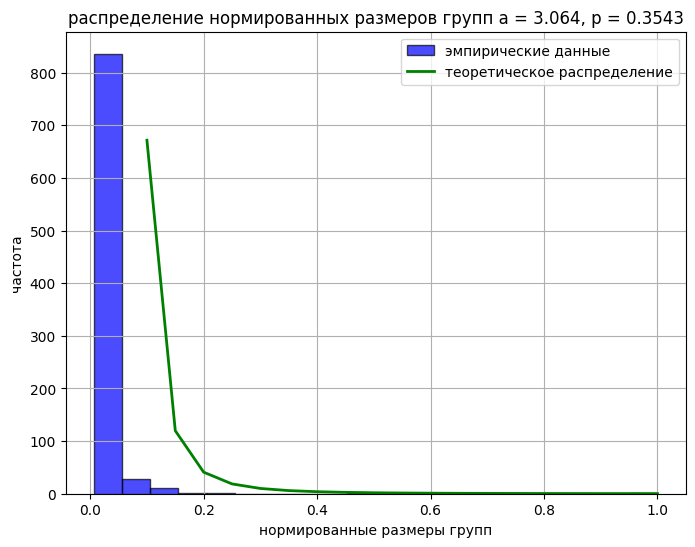

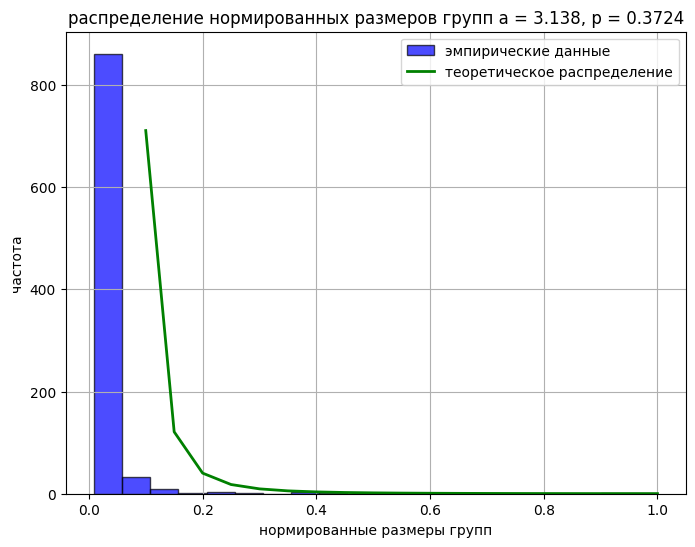

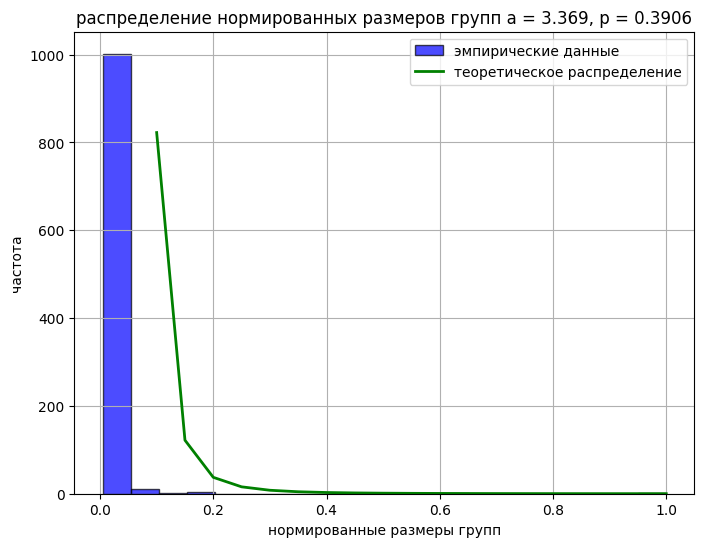

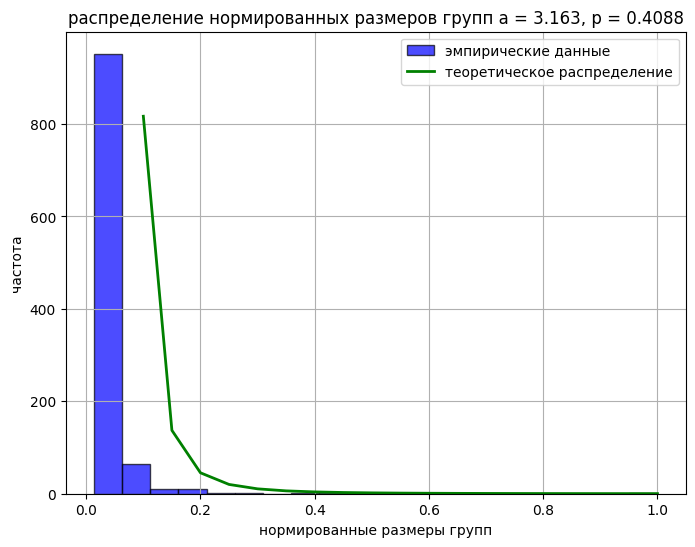

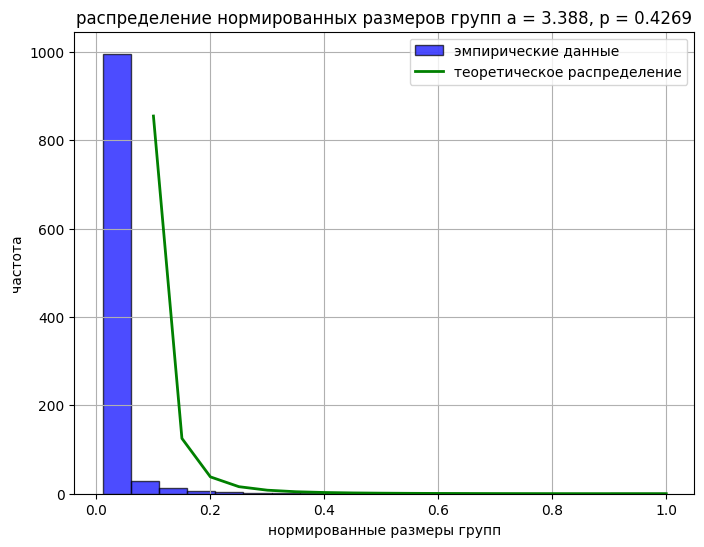

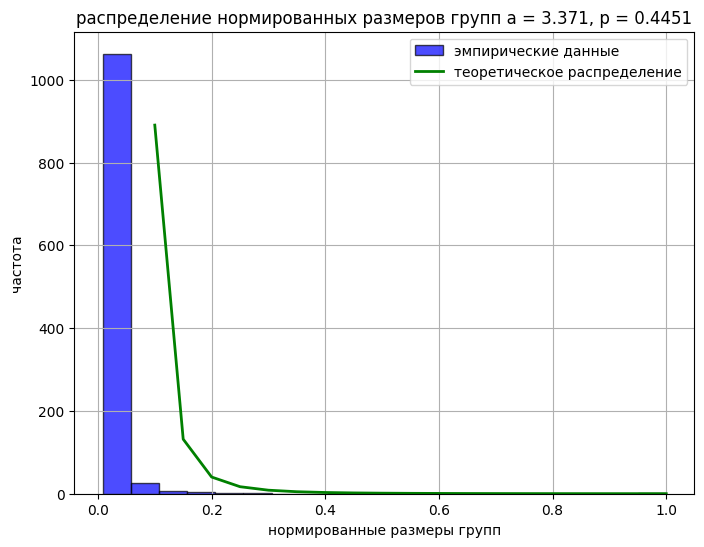

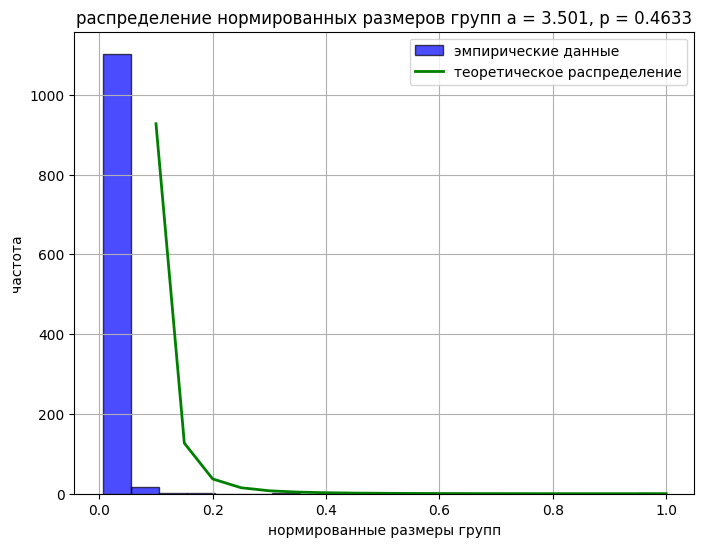

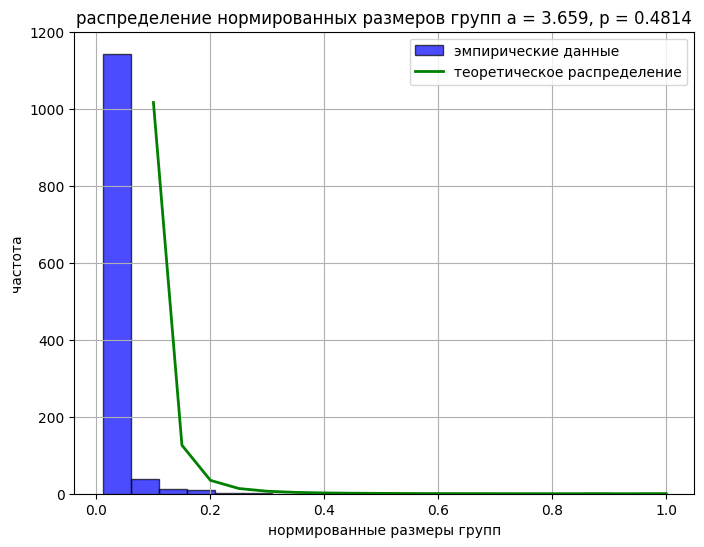

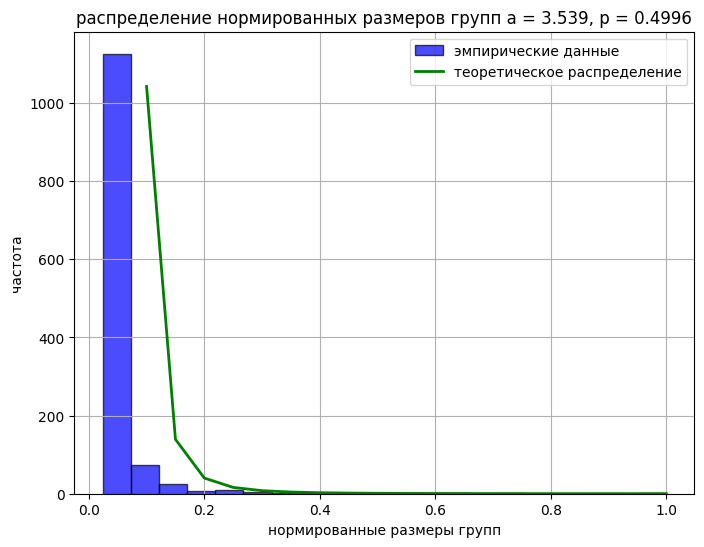

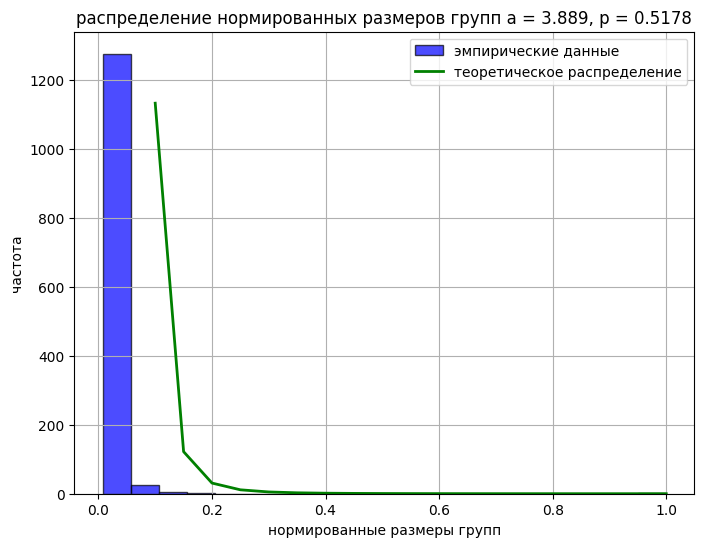

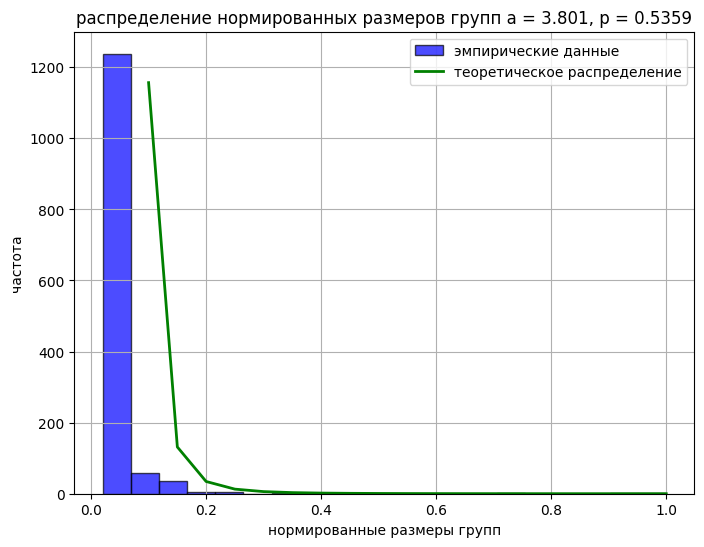

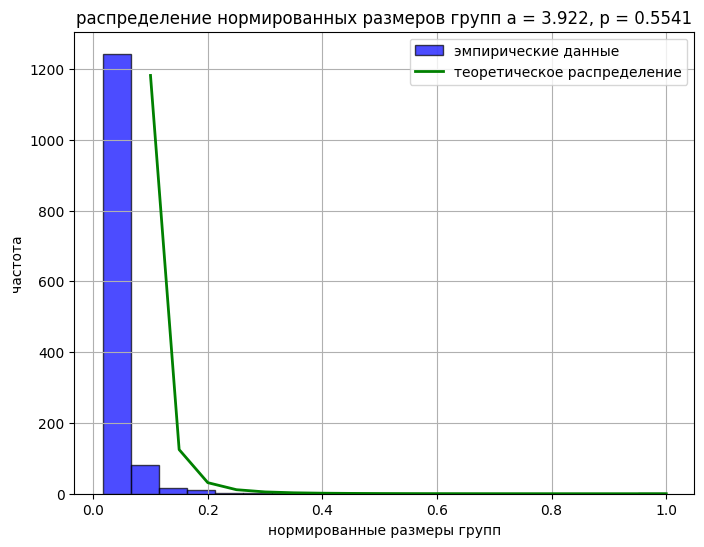

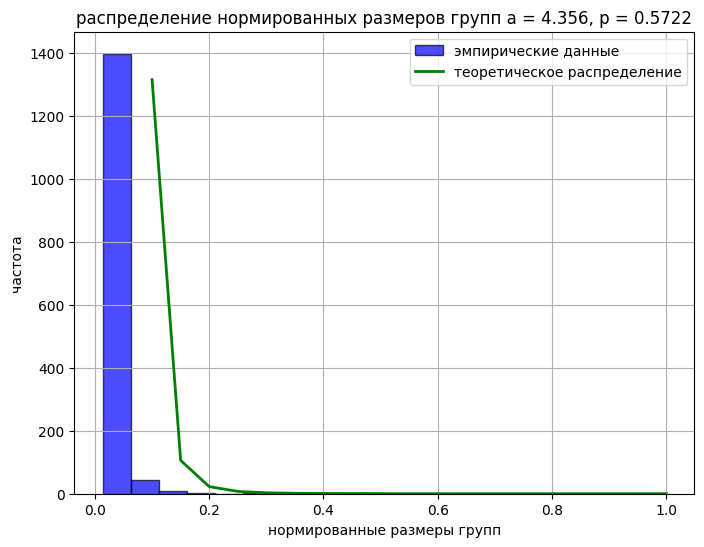

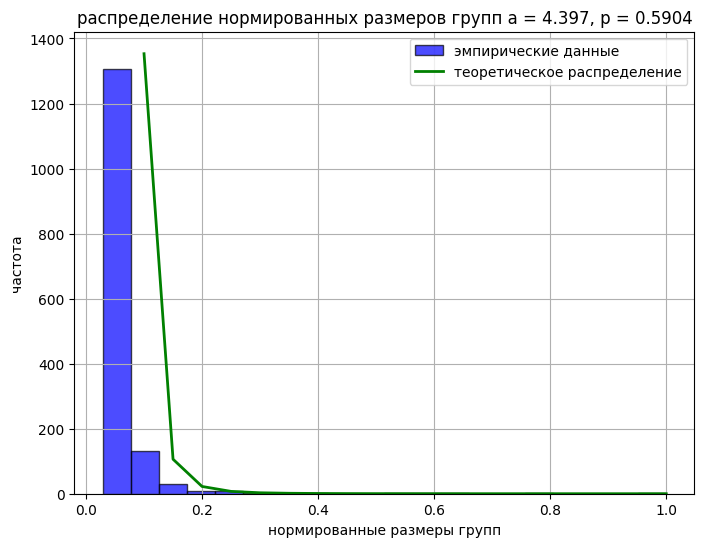

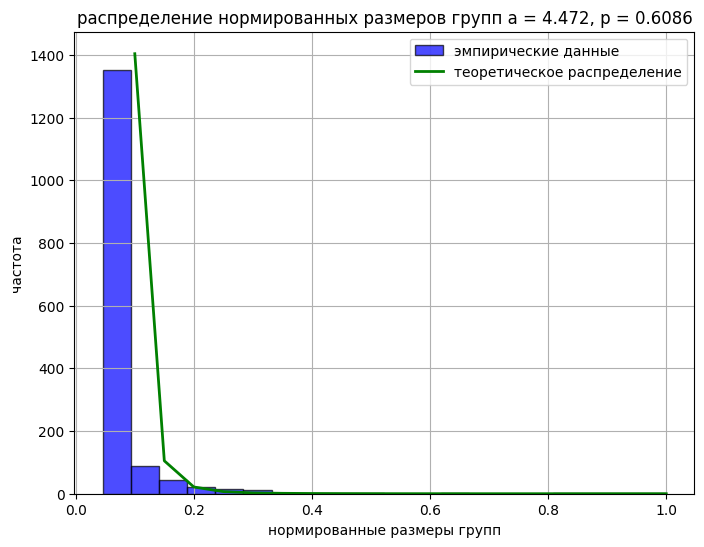

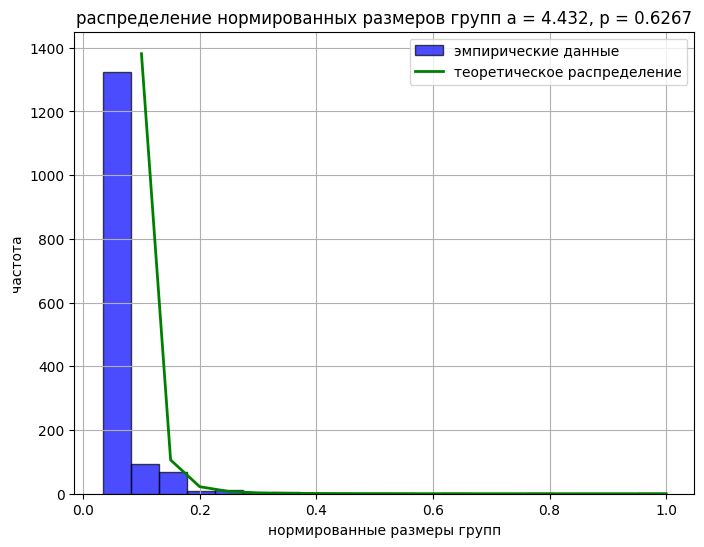

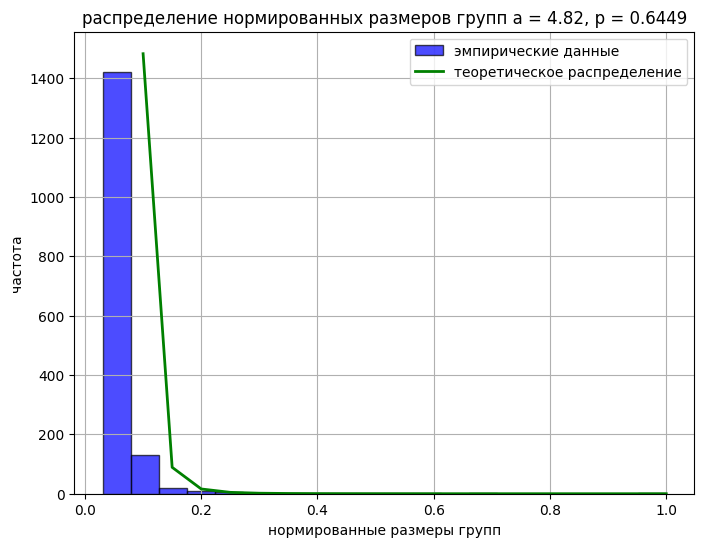

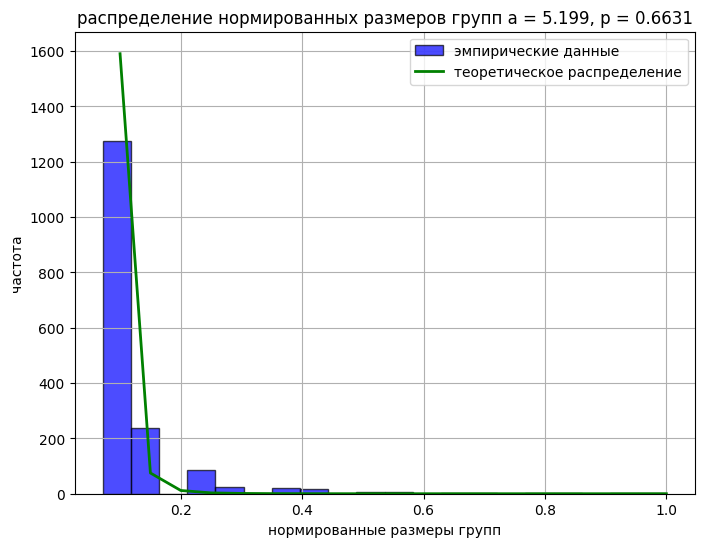

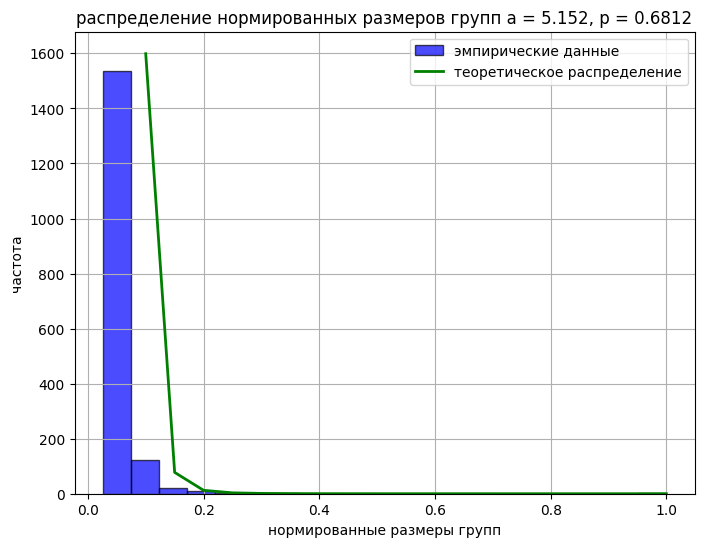

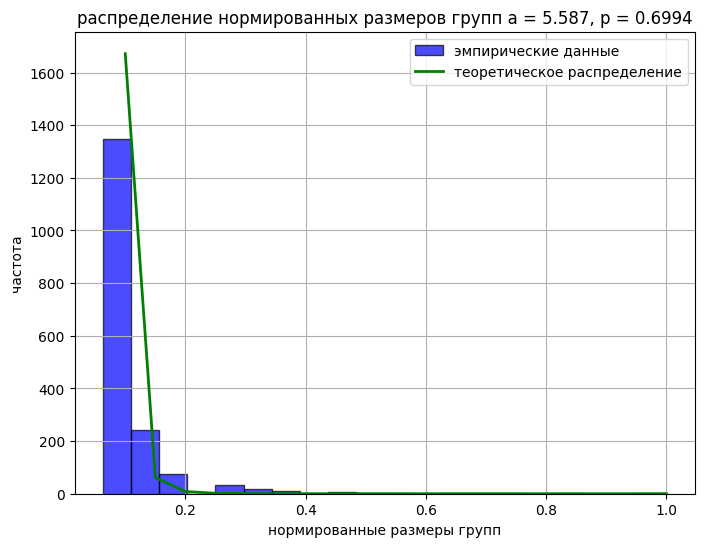

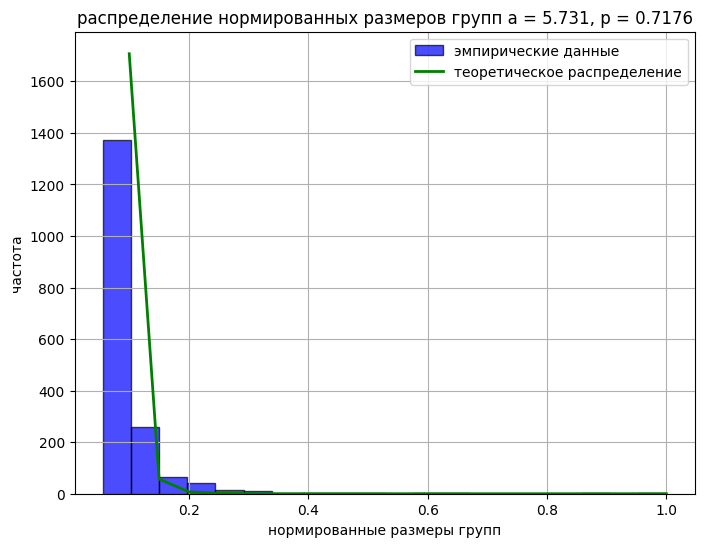

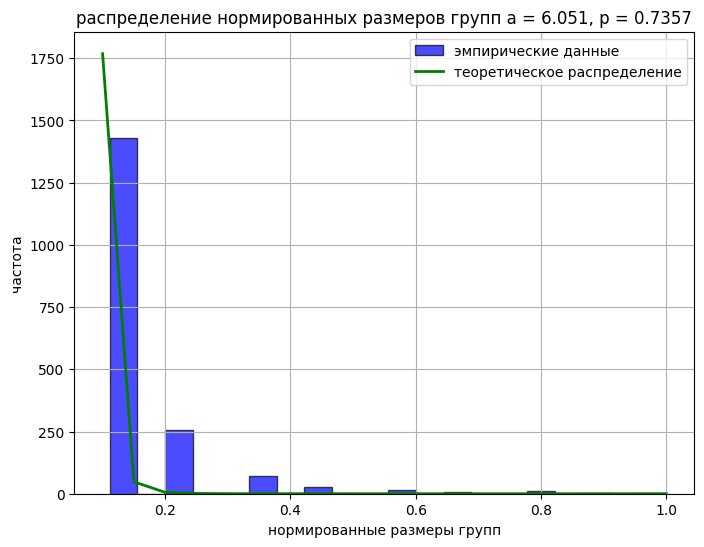

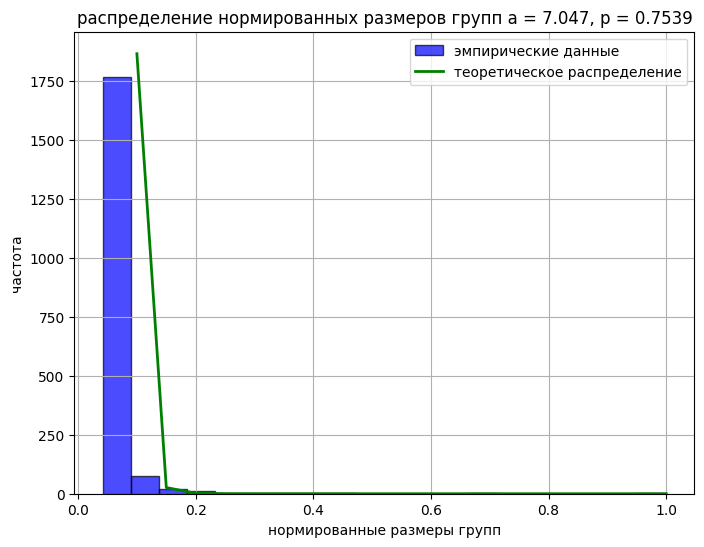

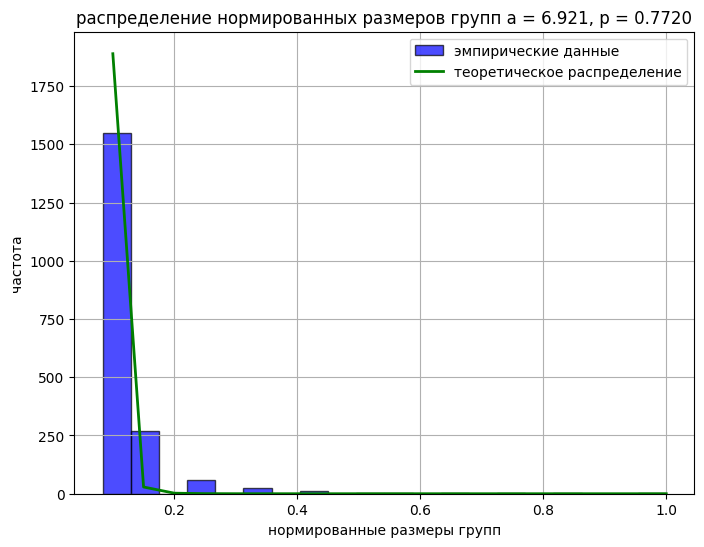

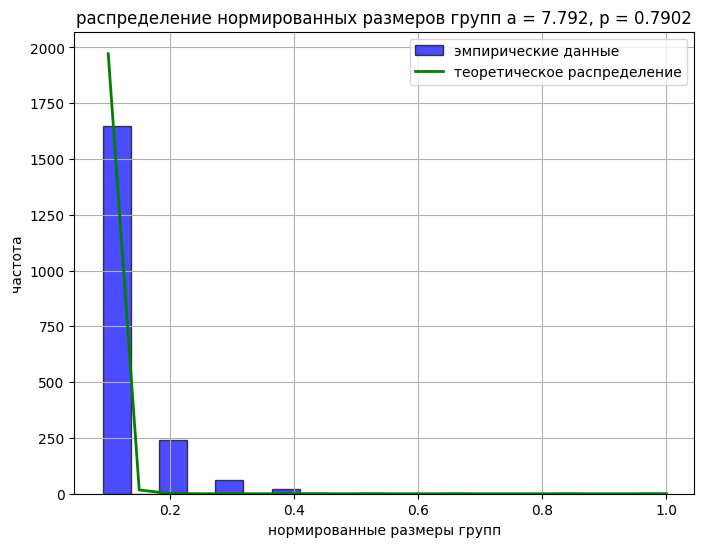

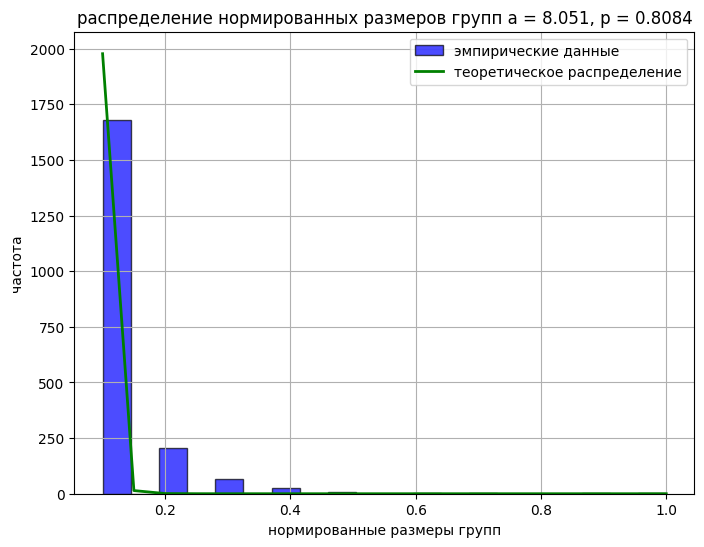

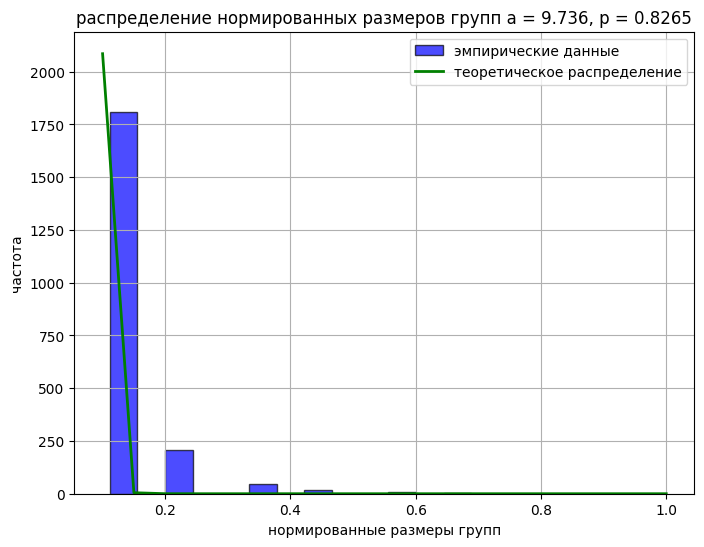

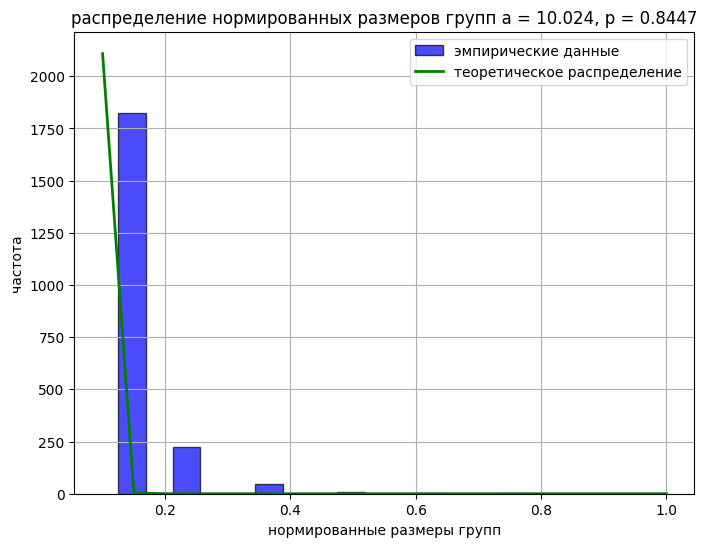

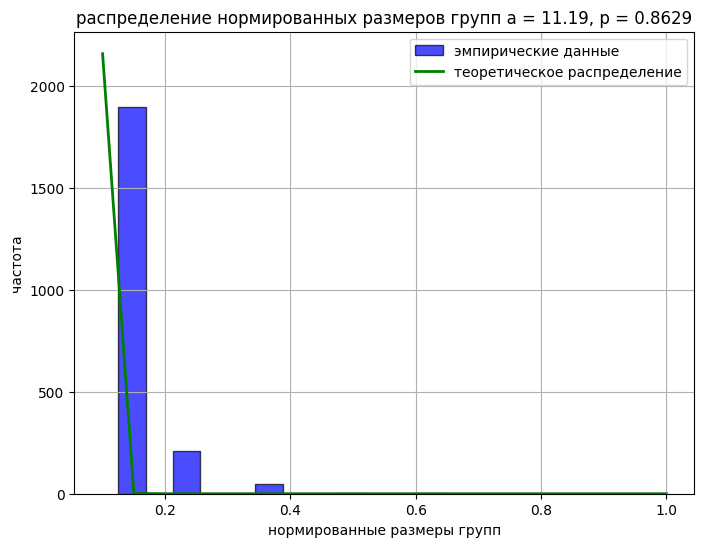

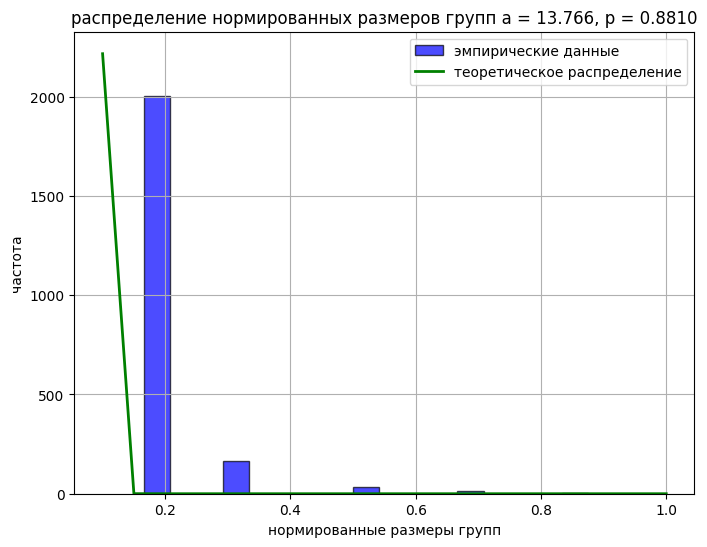

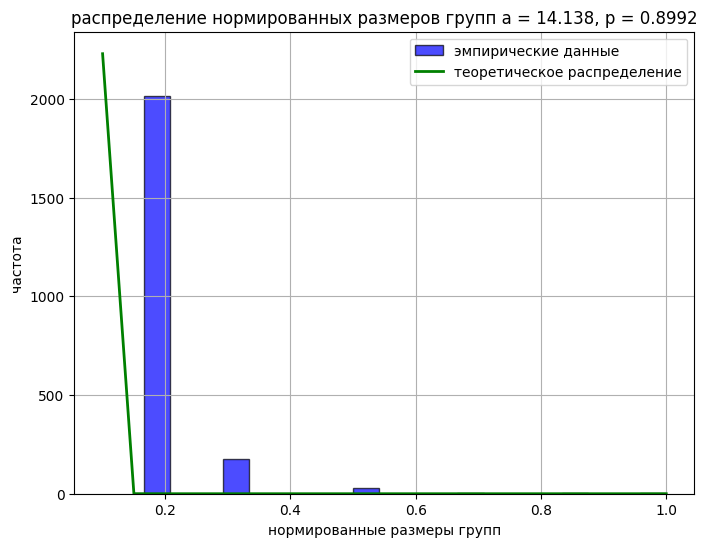

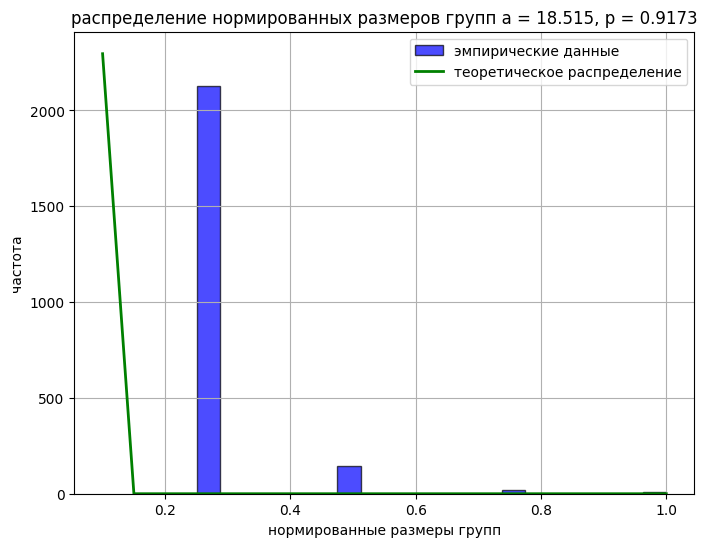

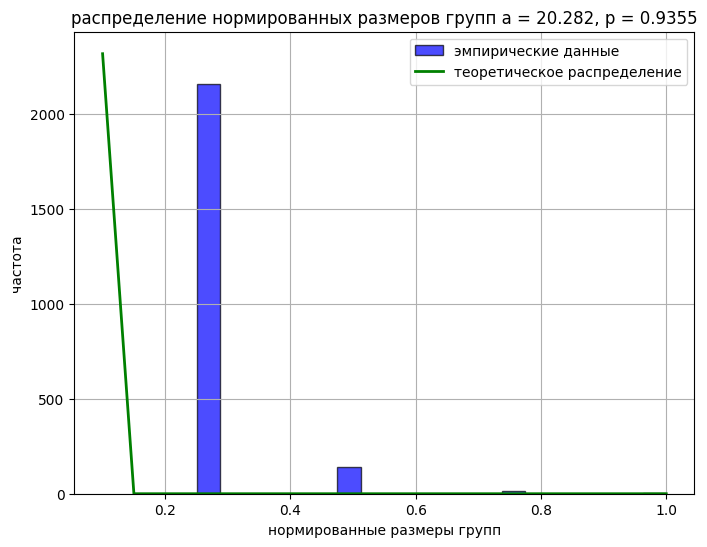

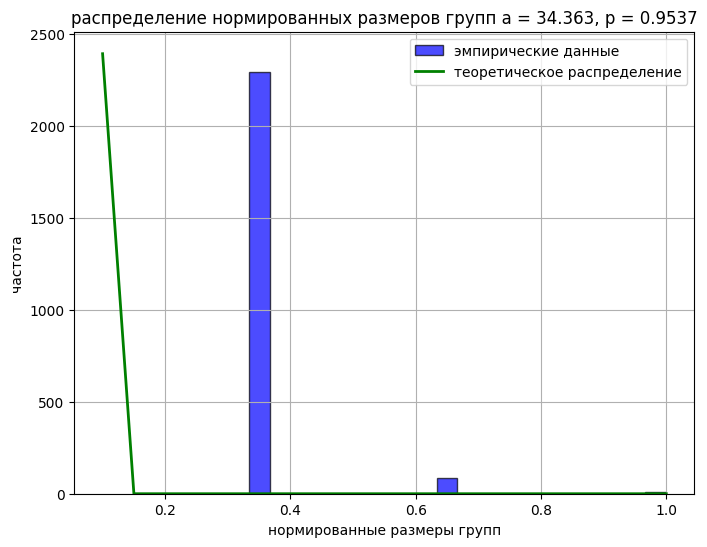

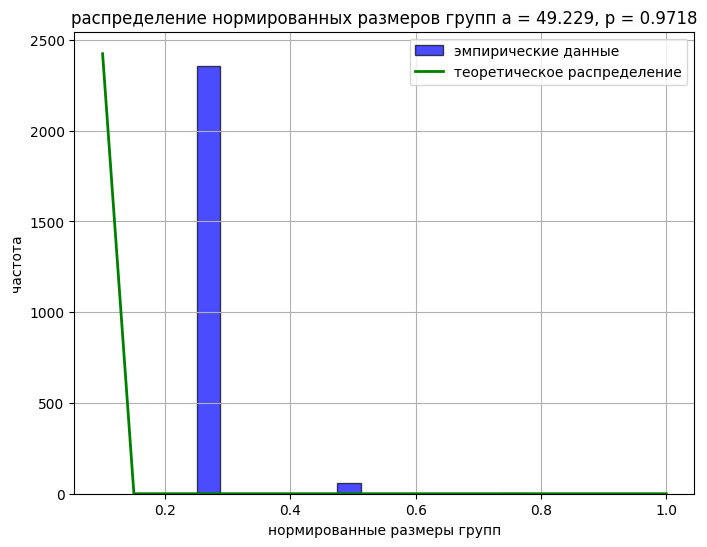

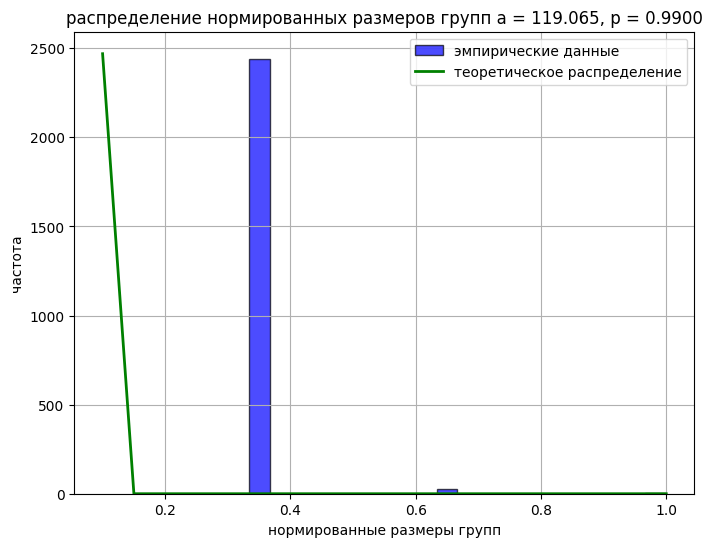

,p,parametrs
0,0.100000,"{'a': 2.37, 'C': 1.37, 'chi2_stat': 8008899999..."
1,0.118163,"{'a': 2.493, 'C': 1.493, 'chi2_stat': 88803999..."
2,0.136327,"{'a': 2.345, 'C': 1.345, 'chi2_stat': 13764099..."
3,0.154490,"{'a': 2.582, 'C': 1.582, 'chi2_stat': 15523599..."
4,0.172653,"{'a': 2.628, 'C': 1.628, 'chi2_stat': 18835599..."
5,0.190816,"{'a': 2.489, 'C': 1.489, 'chi2_stat': 19536399..."
6,0.208980,"{'a': 2.542, 'C': 1.542, 'chi2_stat': 27039999..."
7,0.227143,"{'a': 2.785, 'C': 1.785, 'chi2_stat': 30140099..."
8,0.245306,"{'a': 2.652, 'C': 1.652, 'chi2_stat': 32035599..."
9,0.263469,"{'a': 2.686, 'C': 1.686, 'chi2_stat': 36723599..."


In [92]:
\# df['power_law_results'] = df['club_sizes'].apply(compare_power_law)
# df[['p', 'power_law_results']]

# Пример использования
# df['power_law_results'] = df['club_sizes'].apply(compare_power_law)
# df[['p', 'power_law_results']]

# filtered_df['power_law_results'] = filtered_df['club_sizes'].apply(compare_power_law)
# filtered_df[['p', 'power_law_results']]

# df['power_law_results'] = df['club_sizes'].apply(analyze_distribution)
# df[['p', 'power_law_results']]
df['parametrs'] = df.apply(analyze_distribution, axis=1)
df[['p', 'parametrs']]

Зависимость параметра $a$ от $p$

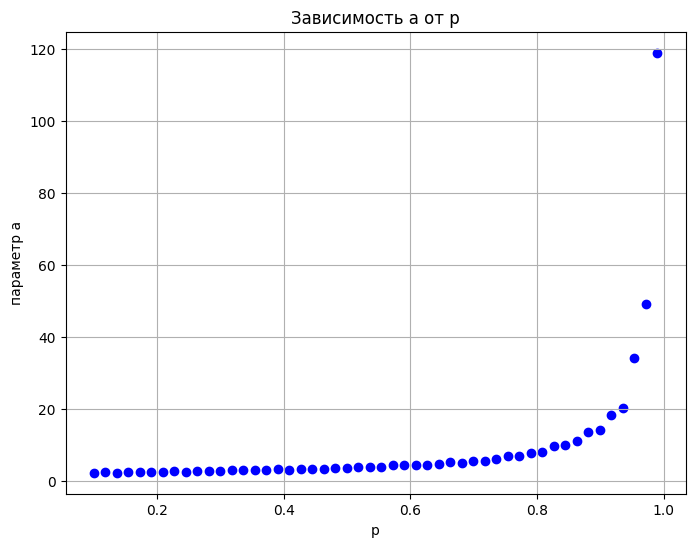

In [79]:
plt.figure(figsize=(8, 6))
plt.scatter(df['p'], df['parametrs'].apply(lambda x: x['a']), marker='o', linestyle='-', color='b')
plt.xlabel('p')
plt.ylabel('параметр a')
plt.title('Зависимость a от p')
plt.grid(True)
plt.show()

* При больших значениях p (близких к 1) параметр
a увеличивается. Это связано с тем, что новые студенты чаще создают новые клубы, и распределение размеров клубов становится менее тяжелым.